6. continued analysis

In [1]:
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import csv

with open('project_results.csv') as csvfile:
  
    myCSVReader = csv.DictReader(csvfile, delimiter=",", quotechar='"')
    
    results = list(myCSVReader)

In [3]:
state_energy_consumption = []
mean_air_quality = []
state_name = []

for i in results:
    state_energy_consumption.append(float(i['state_energy_consumption']))
    mean_air_quality.append(float(i['mean_air_quality']))
    state_name.append(i['state'])

In [4]:
state_energy_consumption = np.array(state_energy_consumption).reshape(-1,1)

In [5]:
# fit linear model

reg = linear_model.LinearRegression()
reg.fit(state_energy_consumption, mean_air_quality)
reg_pred = reg.predict(state_energy_consumption)

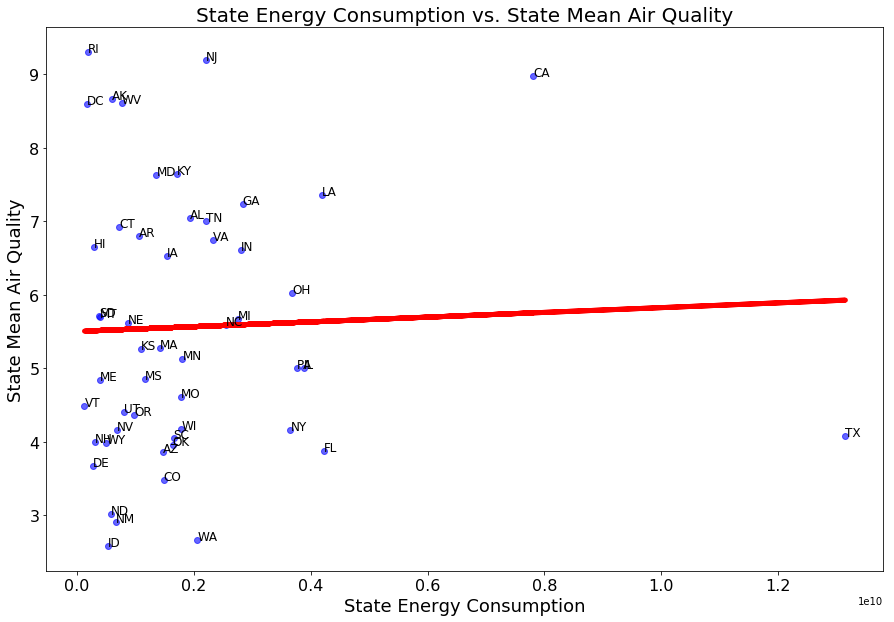

In [6]:
# plot linear fit with TX in plot

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(state_energy_consumption, mean_air_quality, color='blue', alpha=0.6)
ax.plot(state_energy_consumption, reg_pred, color='red', linewidth=5)

for i, txt in enumerate(state_name):
    ax.annotate(txt, (state_energy_consumption[i], mean_air_quality[i]), fontsize = 12)

plt.title('State Energy Consumption vs. State Mean Air Quality', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('State Energy Consumption',fontsize=18)
plt.ylabel('State Mean Air Quality',fontsize=18)
plt.text
plt.show()
fig.savefig('EnergyConsumption_AirQuality_FitLine_withTX.png')

In [7]:
print("The R squared value is", r2_score(mean_air_quality, reg_pred))

The R squared value is 0.0014861935869009413


This figure is fit with TX. It can be seen that the linear line does not fit the data well. It turns out that the R squared value for this fit is only 0.00149, which can be considered as strong evidence that there is no correlation between state energy consumption and state air quality. 

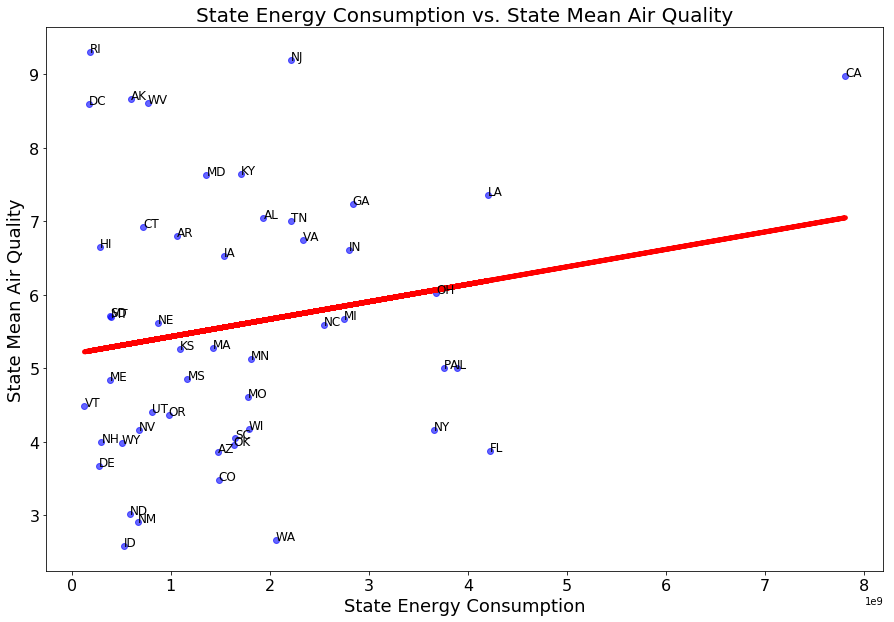

In [8]:
# plot linear fit without TX in plot

state_energy_consumption = []
mean_air_quality = []
state_name = []

for i in results:
    if i['state']!='TX':
        state_energy_consumption.append(float(i['state_energy_consumption']))
        mean_air_quality.append(float(i['mean_air_quality']))
        state_name.append(i['state'])

state_energy_consumption = np.array(state_energy_consumption).reshape(-1,1)

reg = linear_model.LinearRegression()
reg.fit(state_energy_consumption, mean_air_quality)
reg_pred = reg.predict(state_energy_consumption)


fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(state_energy_consumption, mean_air_quality, color='blue', alpha=0.6)
ax.plot(state_energy_consumption, reg_pred, color='red', linewidth=5)

for i, txt in enumerate(state_name):
    ax.annotate(txt, (state_energy_consumption[i], mean_air_quality[i]), fontsize = 12)

plt.title('State Energy Consumption vs. State Mean Air Quality', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('State Energy Consumption',fontsize=18)
plt.ylabel('State Mean Air Quality',fontsize=18)
plt.show()
fig.savefig('EnergyConsumption_AirQuality_FitLine_withoutTX.png')

In [9]:
print("The R squared value after removing TX is", r2_score(mean_air_quality, reg_pred))

The R squared value after removing TX is 0.03602672582496991


In this figure above, TX was excluded. And we can see that this linear line fits the points slightly better than the previous one. However, the R squared value of this fit is 0.036, which is only an insignificant improvement from the last fit. Therefore, we can conclude that there is no correlation between state energy consumption and state mean air quality. 

7. Challenges  
The first challenge was that there was one state name in the state CSV was not the same as the state name in the population CSV. The state name in the state table was called “Washington DC”, while it was called “District of Columbia” in the population table. So, we manually changed the name “District of Columbia” to “Washington DC” in the population CSV file. By doing so, we could successfully match the names of the states in the state table and population table.   
The second challenge was that some rows had multiple states in one cell in the air quality CSV file. This means that such region may be located in the intersections of several states. We had two options: 1. Just delete these instances, 2. Split these instances into different rows, and assign the same measurement to each state in the cell. We chose the second option because we did not want to lose any instances, and it turned out it was not hard to realize through Python.  

8. Analysis tools  
For the plotting library, basically, we found the matplotlib documents and some examples in StackOverflow. The codes were not hard to understand and we could manipulate them after a few minutes of testing. For the linear regression model, we learned it from the machine learning class of ischool, and we could use the Python sklearn library to easily build a linear regression model and calculate the R squared value of the fit. 